**Скачиваем набор данных**

In [ ]:
!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip

--2021-12-03 06:30:32--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.128, 173.194.217.128, 172.217.193.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M  74.4MB/s    in 1.9s    

2021-12-03 06:30:34 (74.4 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



**Разархивируем**

In [ ]:
!unzip horse-or-human.zip

Archive:  horse-or-human.zip
  inflating: horses/horse01-0.png    
  inflating: horses/horse01-1.png    
  inflating: horses/horse01-2.png    
  inflating: horses/horse01-3.png    
  inflating: horses/horse01-4.png    
  inflating: horses/horse01-5.png    
  inflating: horses/horse01-6.png    
  inflating: horses/horse01-7.png    
  inflating: horses/horse01-8.png    
  inflating: horses/horse01-9.png    
  inflating: horses/horse02-0.png    
  inflating: horses/horse02-1.png    
  inflating: horses/horse02-2.png    
  inflating: horses/horse02-3.png    
  inflating: horses/horse02-4.png    
  inflating: horses/horse02-5.png    
  inflating: horses/horse02-6.png    
  inflating: horses/horse02-7.png    
  inflating: horses/horse02-8.png    
  inflating: horses/horse02-9.png    
  inflating: horses/horse03-0.png    
  inflating: horses/horse03-1.png    
  inflating: horses/horse03-2.png    
  inflating: horses/horse03-3.png    
  inflating: horses/horse03-4.png    
  inflating: horses/h

**Скачиваем набор данных**

In [ ]:
!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip

--2021-12-03 06:30:42--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.97.128, 142.251.107.128, 108.177.11.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  --.-KB/s    in 0.1s    

2021-12-03 06:30:42 (95.5 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



**Разархивируем**

In [ ]:
!unzip validation-horse-or-human.zip

Archive:  validation-horse-or-human.zip
  inflating: horses/horse1-000.png   
  inflating: horses/horse1-105.png   
  inflating: horses/horse1-122.png   
  inflating: horses/horse1-127.png   
  inflating: horses/horse1-170.png   
  inflating: horses/horse1-204.png   
  inflating: horses/horse1-224.png   
  inflating: horses/horse1-241.png   
  inflating: horses/horse1-264.png   
  inflating: horses/horse1-276.png   
  inflating: horses/horse1-298.png   
  inflating: horses/horse1-335.png   
  inflating: horses/horse1-384.png   
  inflating: horses/horse1-411.png   
  inflating: horses/horse1-436.png   
  inflating: horses/horse1-455.png   
  inflating: horses/horse1-484.png   
  inflating: horses/horse1-510.png   
  inflating: horses/horse1-539.png   
  inflating: horses/horse1-554.png   
  inflating: horses/horse1-568.png   
  inflating: horses/horse2-011.png   
  inflating: horses/horse2-040.png   
  inflating: horses/horse2-069.png   
  inflating: horses/horse2-112.png   
  inflatin

**Поключаем необходимые библиотеки**

In [ ]:
import shutil
import os

**Создаем папки**

In [ ]:
!mkdir HuH

In [ ]:
!cp -r /content/horses /content/HuH

In [ ]:
!cp -r /content/humans /content/HuH

**Считаем кол-во изображений**

In [ ]:
!ls /content/HuH/humans | wc -l

655


**Удаляем лишние**

In [ ]:
for root, dirs, files in os.walk('/content/HuH/humans'):
  count = 0
  for fil in files:
    print(fil)
    p = os.path.join(root, fil)
    os.remove(p)
    count+=1
    if count == 27:
      break
  if count == 27:
    break    

valhuman02-16.png
human03-27.png
human05-03.png
valhuman03-12.png
human07-28.png
human14-28.png
human16-05.png
valhuman02-17.png
human07-11.png
human02-07.png
valhuman04-00.png
human17-11.png
human08-02.png
human05-01.png
human08-10.png
human16-22.png
human11-01.png
valhuman03-15.png
valhuman02-09.png
human07-25.png
human09-02.png
valhuman01-06.png
human15-00.png
human05-15.png
human15-01.png
human15-16.png
human15-21.png


**Снова счиатем кол-во изображений**

In [ ]:
!ls /content/HuH/horses | wc -l

628


In [ ]:
!ls /content/HuH/humans | wc -l

628


**Создаем переменные**

In [ ]:
data_dir = '/content/HuH/'
train_dir = 'train'
val_dir   = 'val'
test_dir  = 'test'
test_portion = 0.15
val_portion = 0.15
nb_images = 600

**Функия создания папок**

In [ ]:
def create_dir(dir_name):
  
  if os.path.exists(dir_name):
    shutil.rmtree(dir_name)

  os.makedirs(dir_name)
  os.makedirs(os.path.join(dir_name, "horses1"))
  os.makedirs(os.path.join(dir_name, "humans1"))

**Создаем папки**

In [ ]:
create_dir(train_dir)
create_dir(test_dir)
create_dir(val_dir)

**Функция переименовывания изображений**

In [ ]:
def new_name_img (path):
  for root, dirs, files in os.walk(path):
    i = 0
    for fil in files:
      new_name = str(i) + ".png"
      new = os.path.join(root, new_name)
      old = os.path.join(root, fil)
      os.rename(old,new)
      i+=1

In [ ]:
new_name_img('/content/HuH/horses')

In [ ]:
new_name_img('/content/HuH/humans')

**Функция копирования изображений**

In [ ]:
def copy_images(st, ed, src, dst):
  for i in range(st, ed):
    shutil.copy2(os.path.join(src, "horses/" + str(i) + ".png"), os.path.join(dst, "horses1"))
    shutil.copy2(os.path.join(src, "humans/" + str(i) + ".png"), os.path.join(dst, "humans1"))

**Распределяем кол-во изображений**

In [ ]:
start_val = int(nb_images * (1 - val_portion - test_portion))
start_tst = int(nb_images * (1 - test_portion))
print(start_val)
print(start_tst)
# train - 0..437
# val   - 438 .. 531
# test  - 532 .. 627

420
510


**Копируем изображения**

In [ ]:
copy_images(0, start_val, data_dir, train_dir)

In [ ]:
copy_images(start_val, start_tst, data_dir, val_dir)

In [ ]:
copy_images(start_tst, nb_images, data_dir, test_dir)

In [ ]:
img_width, img_height = 224, 224
input_shape = (img_width, img_height, 3)
epochs = 2
batch_size = 128
nb_train   = 17500
nb_val     = 3750
nb_test    = 3750

**Создаем генератор изображений**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = datagen.flow_from_directory(train_dir, 
                                              target_size=(img_width, img_height),
                                              batch_size = batch_size,
                                              class_mode='binary')

Found 840 images belonging to 2 classes.


In [ ]:
val_generator = datagen.flow_from_directory(val_dir, 
                                              target_size=(img_width, img_height),
                                              batch_size = batch_size,
                                              class_mode='binary')

Found 180 images belonging to 2 classes.


In [ ]:
test_generator = datagen.flow_from_directory(test_dir, 
                                              target_size=(img_width, img_height),
                                              batch_size = batch_size,
                                              class_mode='binary')

Found 180 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.resnet_v2 import ResNet101V2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet_v2 import preprocess_input, decode_predictions
import numpy as np

**Перенос обучениия в Keras**

In [ ]:
model_net = ResNet101V2(weights = 'imagenet', include_top = False, input_shape=(224, 224, 3))
model_net.trainable=False

171327488/171317808 [==============================] - 3s 0us/step


**Создание нейронной сети**

In [ ]:
from tensorflow.keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, Flatten, Activation, Dense
from keras.preprocessing.image import ImageDataGenerator

**Создаем составную сеть**

In [ ]:
model = Sequential()
model.add(model_net)
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

**Составная сеть**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101v2 (Functional)    (None, 7, 7, 2048)        42626560  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
 activation_1 (Activation)   (None, 1)                 0

**Компилируем составную сеть**

In [ ]:
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate = 1e-5)
model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics=['accuracy'])

**Обучаем нейронную сеть**

In [ ]:
model.fit_generator(train_generator, 
                    steps_per_epoch = nb_train // batch_size,
                    epochs = epochs,
                    validation_data  = val_generator,
                    validation_steps = nb_val // batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/2
136/136 [==============================] - 202s 1s/step - loss: 0.7043 - accuracy: 0.7679 - val_loss: 0.0050 - val_accuracy: 1.0000


**Оцениваем качество работы сети**

In [ ]:
scores = model.evaluate_generator(test_generator, nb_test // batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
print("Аккуратность на тестовых данных: %.2f%%" %(scores[1]*100))

Аккуратность на тестовых данных: 99.44%


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
def omg (path):
  img = image.load_img(path, target_size=(224, 224, 3))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  pred = model.predict(x)[0][0]
  result = tf.sigmoid(pred)
  pred_label = 'Horse' if result <= 0.51 else 'Human'
  print(pred_label)
  return img

Horse


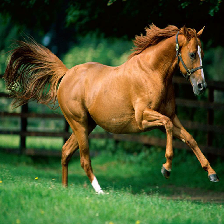

In [ ]:
omg('/content/drive/My Drive/horse.jpg')

Human


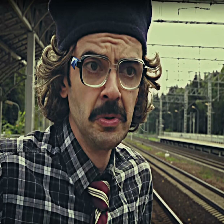

In [ ]:
omg('/content/drive/My Drive/111.jpg')

Horse


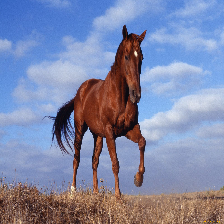

In [ ]:
omg('/content/drive/My Drive/horse1.jpg')